# **Introduction**

In the era of streaming platforms, Netflix has emerged as a global leader, offering a wide variety of movies, TV shows, and original content. The objective of this data science project is to perform a detailed analysis on a Netflix dataset using Python.The dataset includes information such as type,title,director,cast,country,release_year,rating,duratio.

By using pandas, matplotlib, seaborn, and wordcloud, this project explores key metrics, trends, and patterns to gain valuable insights into Netflix's content strategy, audience preferences, and quality assessment.

In [17]:
# Step 1: Import libraries
!pip install squarify
!pip install wordcloud seaborn matplotlib squarify
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import squarify


## Import dataset

In [18]:
# Step 2: Load CSV files
df = pd.read_csv('netflix_titles.csv')

# Explore datasets

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Clean Data

In [21]:
# Drop columns
df = df.drop(['director', 'cast'], axis=1)

In [22]:
# Concatenate 'rating' and 'duration' columns into a new column
df['rating_duration'] = df['rating'].astype(str) + '_' + df['duration'].astype(str)

# Descriptive Statistics

In [23]:
print("\nDescriptive Stats:\n", df.describe(include='all'))


Descriptive Stats:
        show_id   type   title        country       date_added  release_year  \
count     8807   8807    8807           8807             8797   8807.000000   
unique    8807      2    8807            749             1767           NaN   
top      s8807  Movie  Zubaan  United States  January 1, 2020           NaN   
freq         1   6131       1           2818              109           NaN   
mean       NaN    NaN     NaN            NaN              NaN   2014.180198   
std        NaN    NaN     NaN            NaN              NaN      8.819312   
min        NaN    NaN     NaN            NaN              NaN   1925.000000   
25%        NaN    NaN     NaN            NaN              NaN   2013.000000   
50%        NaN    NaN     NaN            NaN              NaN   2017.000000   
75%        NaN    NaN     NaN            NaN              NaN   2019.000000   
max        NaN    NaN     NaN            NaN              NaN   2021.000000   

       rating  duration       

## Data visualizations

In [24]:
df['date_added'] = df['date_added'].astype(str).str.strip()  # Remove spaces
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', format='mixed')  # Convert to datetime
df['year_added'] = df['date_added'].dt.year  # Extract year


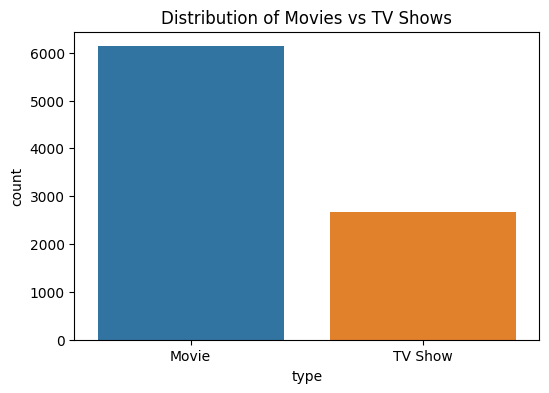

In [25]:

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

# 1. Distribution of Content Types
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Movies vs TV Shows')
plt.show()

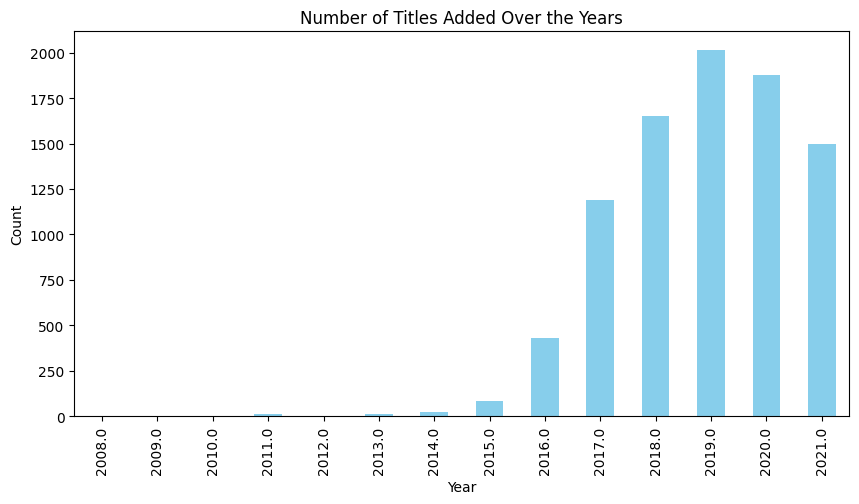

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # Ensure valid dates
df['year_added'] = df['date_added'].dt.year  # Extract year

# 2. Trend of Content Added Over Time
plt.figure(figsize=(10, 5))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Titles Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

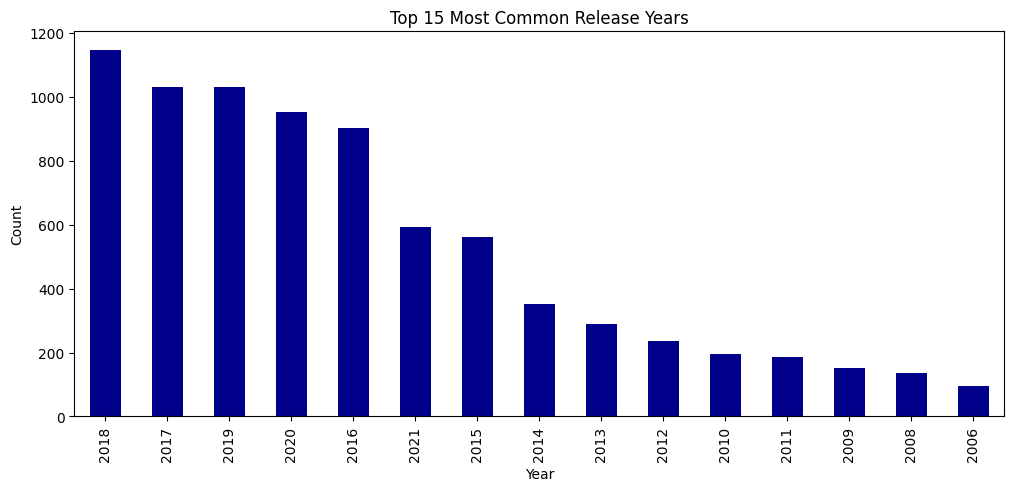

In [ ]:
# 3. Most Common Release Years
plt.figure(figsize=(12, 5))
df['release_year'].value_counts().nlargest(15).plot(kind='bar', color='darkblue')
plt.title('Top 15 Most Common Release Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

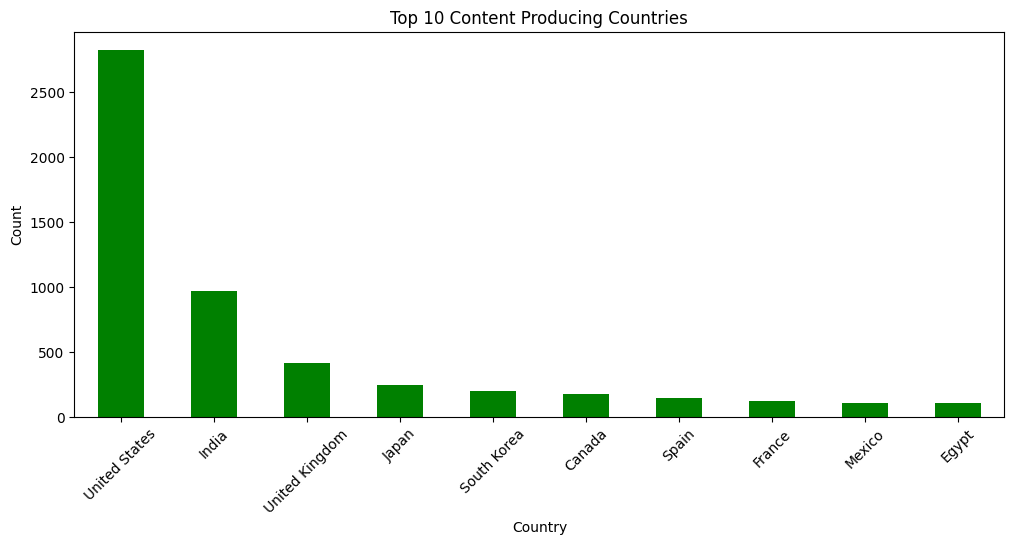

In [ ]:
# 4. Top Countries Producing Content
plt.figure(figsize=(12, 5))
df['country'].value_counts().nlargest(10).plot(kind='bar', color='green')
plt.title('Top 10 Content Producing Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

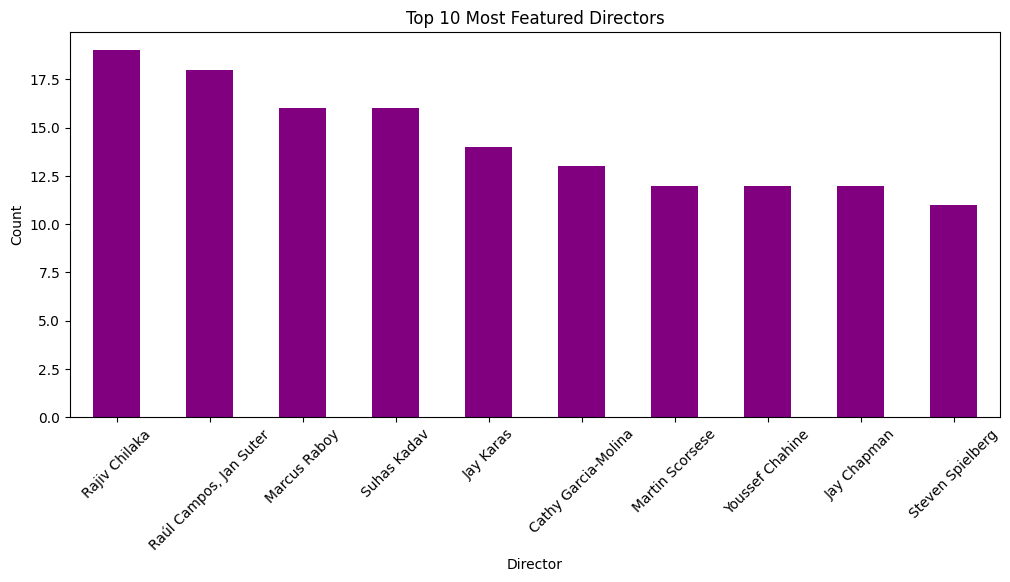

In [ ]:
# 5. Most Frequent Directors
plt.figure(figsize=(12, 5))
df['director'].dropna().value_counts().nlargest(10).plot(kind='bar', color='purple')
plt.title('Top 10 Most Featured Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

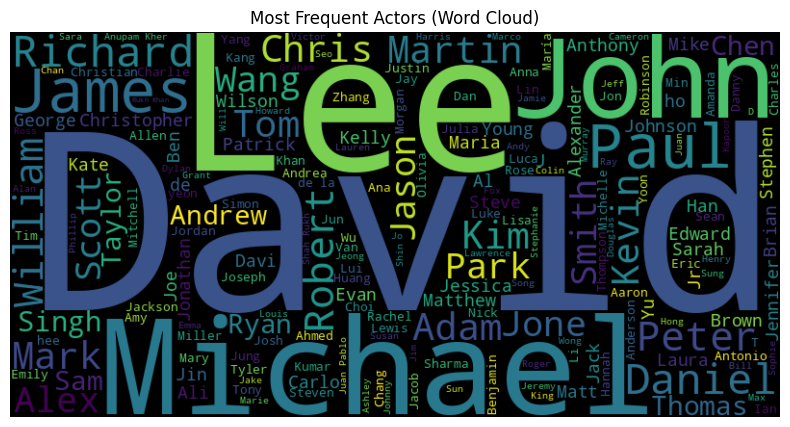

In [ ]:
from wordcloud import WordCloud
# 6. Most Frequent Actors (Word Cloud)
text = ' '.join(df['cast'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Actors (Word Cloud)')
plt.show()

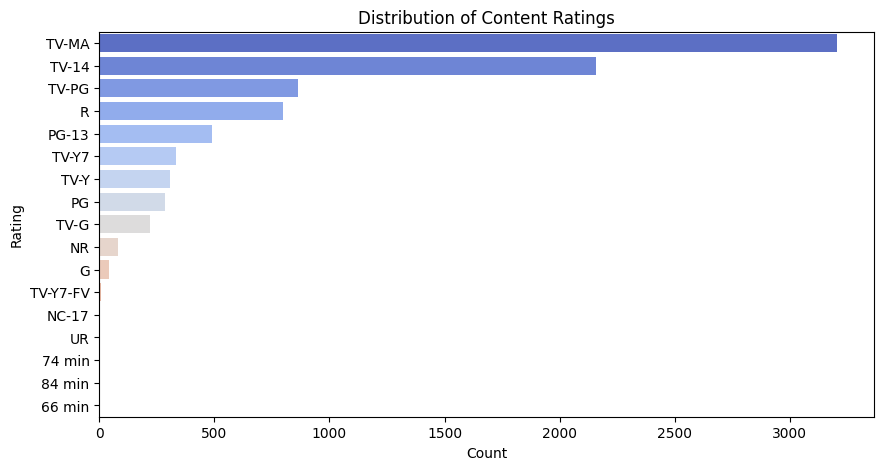

In [ ]:
# 7. Distribution of Ratings
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

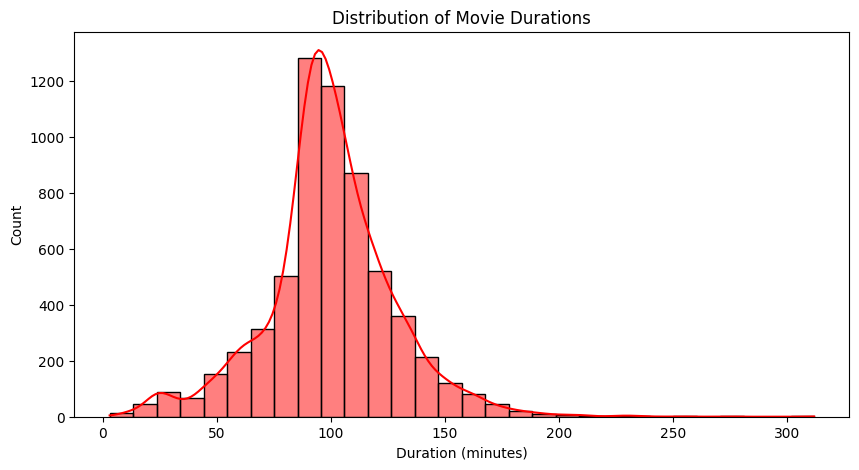

In [ ]:
# 8. Duration Analysis (Movies)
duration_movies = df[df['type'] == 'Movie'].copy()
duration_movies['duration'] = duration_movies['duration'].str.replace(' min', '').astype(float)
plt.figure(figsize=(10, 5))
sns.histplot(duration_movies['duration'].dropna(), bins=30, color='red', kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

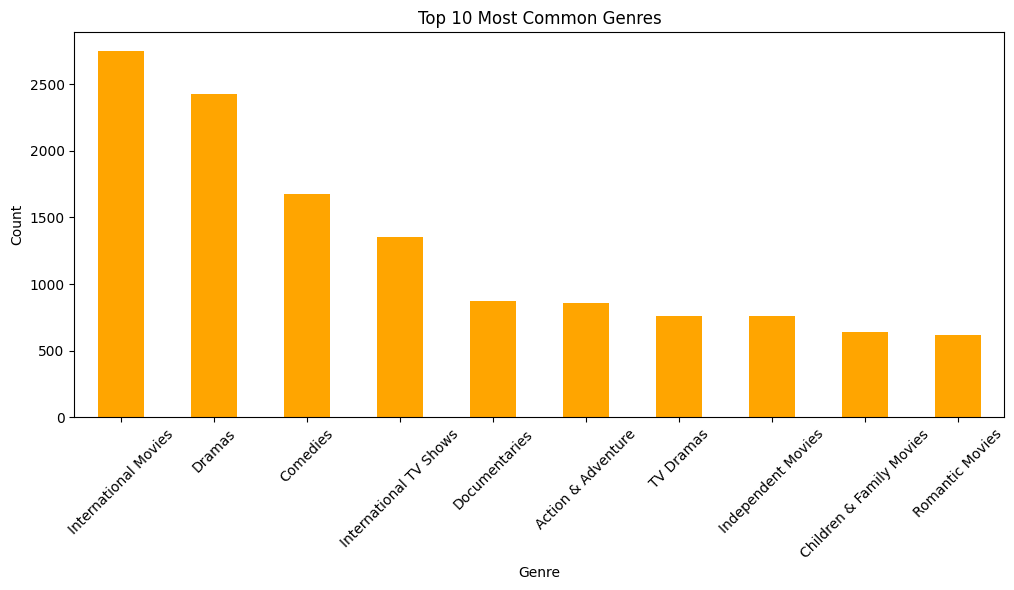

In [ ]:
# 9. Most Popular Genres
plt.figure(figsize=(12, 5))
genres = df['listed_in'].str.split(', ', expand=True).stack()
genres.value_counts().nlargest(10).plot(kind='bar', color='orange')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

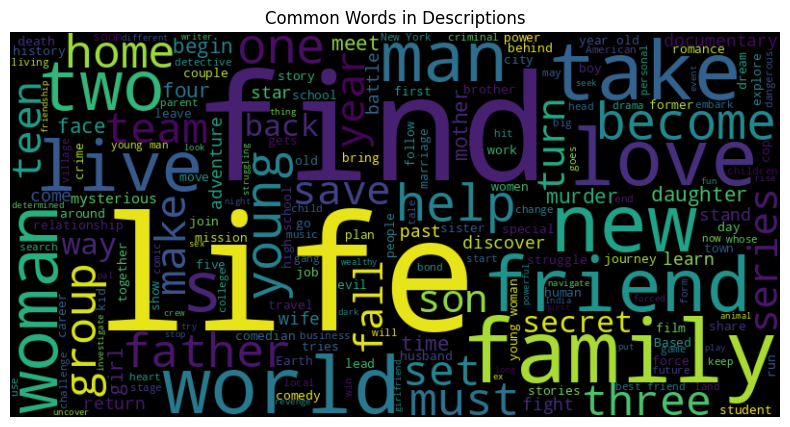

In [ ]:
# 10. Text Analysis of Descriptions (Word Cloud)
text_desc = ' '.join(df['description'].dropna())
wordcloud_desc = WordCloud(width=800, height=400, background_color='black').generate(text_desc)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_desc, interpolation='bilinear')
plt.axis("off")
plt.title('Common Words in Descriptions')
plt.show()

# Machine learning

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Explore Data

In [27]:
print(df.head())
print(df.info())
print(df.describe())

  show_id     type                  title        country date_added  \
0      s1    Movie   Dick Johnson Is Dead  United States 2021-09-25   
1      s2  TV Show          Blood & Water   South Africa 2021-09-24   
2      s3  TV Show              Ganglands        Unknown 2021-09-24   
3      s4  TV Show  Jailbirds New Orleans        Unknown 2021-09-24   
4      s5  TV Show           Kota Factory          India 2021-09-24   

   release_year rating   duration  \
0          2020  PG-13     90 min   
1          2021  TV-MA  2 Seasons   
2          2021  TV-MA   1 Season   
3          2021  TV-MA   1 Season   
4          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

             

In [6]:
df = df.dropna(subset=['type'])  # Drop rows with missing target values
df = df.fillna("Unknown")

In [7]:
# Selecting categorical features for encoding
categorical_cols = ['director', 'cast', 'country', 'rating', 'listed_in']
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

In [9]:
# Convert date_added to year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year.fillna(0).astype(int)

In [10]:
# Define features and target
X = df[['director', 'cast', 'country', 'rating', 'listed_in', 'year_added', 'release_year']]
y = encoder.fit_transform(df['type'])  # Convert 'Movie'/'TV Show' to numeric

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC()
}

In [13]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    print(f"{name} Accuracy: {acc:.2f}%")

Logistic Regression Accuracy: 86.49%
Random Forest Accuracy: 97.62%
Gradient Boosting Accuracy: 99.55%
Support Vector Machine Accuracy: 87.51%


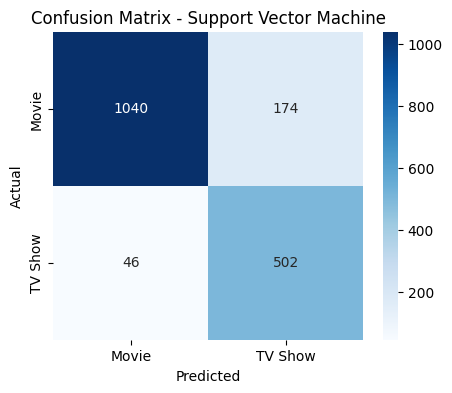

In [14]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()